In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


whr = pd.read_csv("whr.csv").dropna()
whr.head()

,Country name,Iso alpha,year,Happiness score,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,AFG,2008,3.724,7.350,0.451,50.5,0.718,0.168,0.882,0.414,0.258
1,Afghanistan,AFG,2009,4.402,7.509,0.552,50.8,0.679,0.191,0.850,0.481,0.237
2,Afghanistan,AFG,2010,4.758,7.614,0.539,51.1,0.600,0.121,0.707,0.517,0.275
3,Afghanistan,AFG,2011,3.832,7.581,0.521,51.4,0.496,0.164,0.731,0.480,0.267
4,Afghanistan,AFG,2012,3.783,7.661,0.521,51.7,0.531,0.238,0.776,0.614,0.268


<Axes: >

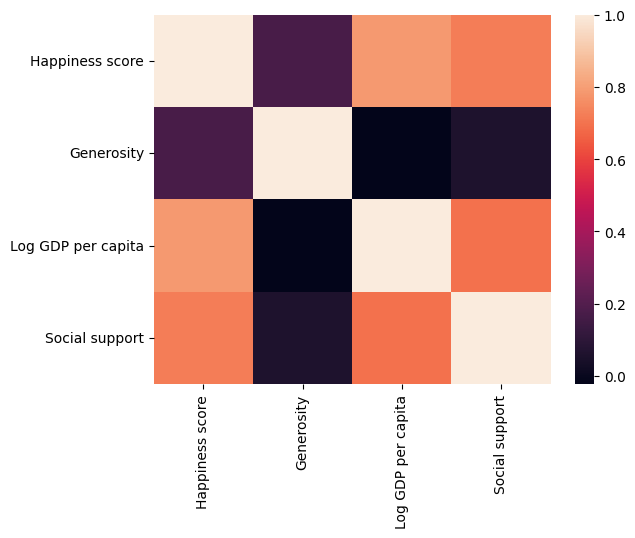

In [2]:
sns.heatmap(whr[['Happiness score', 'Generosity', 'Log GDP per capita', 'Social support']].corr())

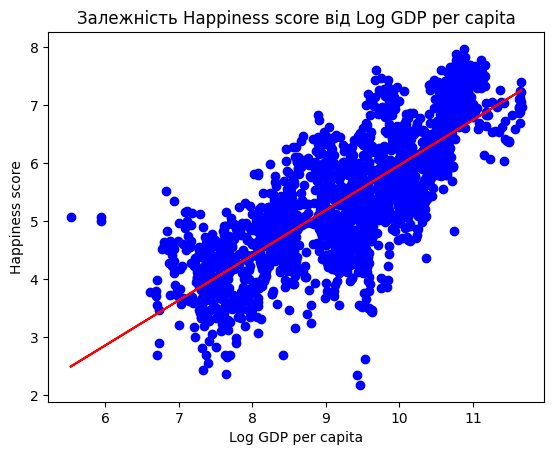

In [3]:

def showLineRegresion(x, y):
    gdp = whr[x]  
    hs = whr[y]      
    
    
    gdp = gdp.values.reshape(-1, 1)
    
    
    model = LinearRegression()
    model.fit(gdp, hs)
    
  
    predicted_hs = model.predict(gdp)
    
  
    plt.scatter(gdp, hs, color='blue')  
    plt.plot(gdp, predicted_hs, color='red')  
    plt.title(f'Залежність {y} від {x}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()


showLineRegresion('Log GDP per capita', 'Happiness score')

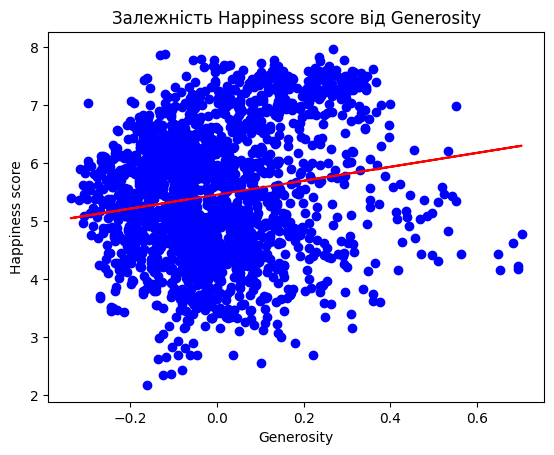

In [4]:
showLineRegresion('Generosity', 'Happiness score')

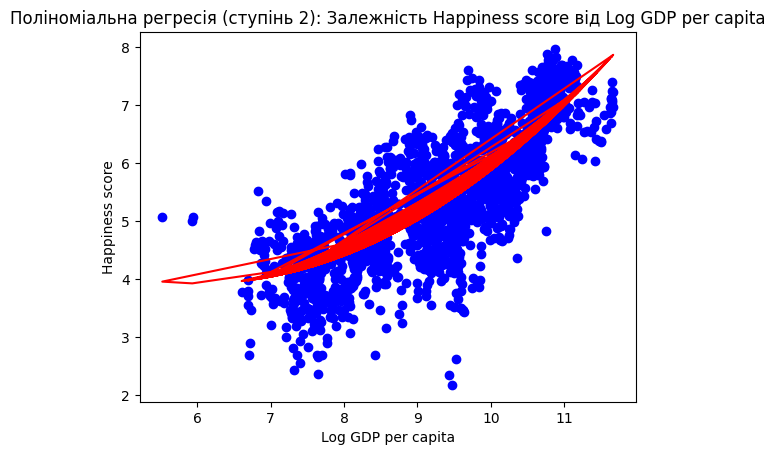

In [5]:
def polynomial_regression(x_column, y_column, degree = 2):
    x = whr[x_column].values.reshape(-1, 1)
    y = whr[y_column]
    poly = PolynomialFeatures(degree=degree)
    x_poly = poly.fit_transform(x)
    model = LinearRegression()
    model.fit(x_poly, y)
    predicted_y = model.predict(x_poly)
    
    plt.scatter(x, y, color='blue')
    plt.plot(x, predicted_y, color='red')
    plt.title(f'Поліноміальна регресія (ступінь {degree}): Залежність {y_column} від {x_column}')
    plt.xlabel(f'{x_column}')
    plt.ylabel(f'{y_column}')
    plt.show()

polynomial_regression('Log GDP per capita', 'Happiness score')


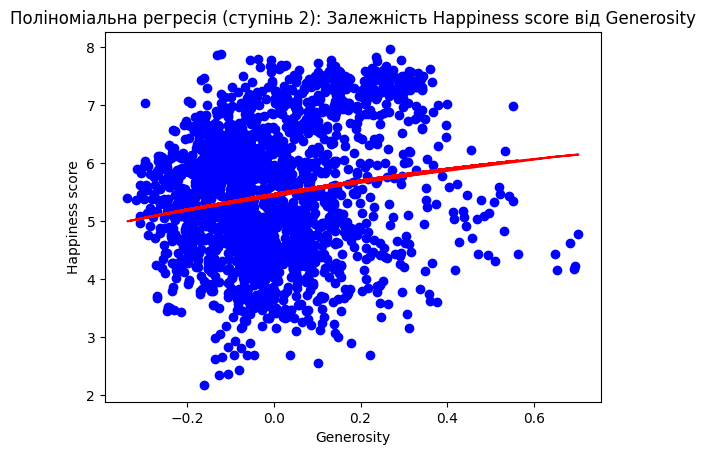

In [6]:
polynomial_regression('Generosity', 'Happiness score')